In [ ]:
import pandas_datareader as pdr

In [ ]:
key="xxxxxxxxxxxxxxxxxxxxxxxxxx"    # your tiingo api key

In [3]:
df = pdr.get_data_tiingo('NDAQ', api_key=key)

C:\Users\anand\AppData\Local\Temp\ipykernel_9564\2770781903.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('NDAQ', api_key=key)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from numpy import array

In [6]:
dirname='C:/Users/anand/Desktop/airflow-2023/NDAQ2.csv'
df.to_csv(dirname)
df=pd.read_csv('C:/Users/anand/Desktop/airflow-2023/NDAQ2.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NDAQ,2018-01-02 00:00:00+00:00,76.74,77.32,76.47,77.15,1119938,23.586854,23.765123,23.503867,23.712872,3359814,0.0,1.0
1,NDAQ,2018-01-03 00:00:00+00:00,77.66,77.87,76.58,76.64,998415,23.869626,23.934171,23.537676,23.556118,2995245,0.0,1.0
2,NDAQ,2018-01-04 00:00:00+00:00,78.69,78.96,77.54,77.64,956602,24.186207,24.269194,23.832742,23.863478,2869806,0.0,1.0
3,NDAQ,2018-01-05 00:00:00+00:00,79.21,79.55,78.70,79.01,926725,24.346035,24.450537,24.189281,24.284562,2780175,0.0,1.0
4,NDAQ,2018-01-08 00:00:00+00:00,79.96,80.53,79.20,79.26,832800,24.576555,24.751751,24.342961,24.361403,2498400,0.0,1.0


In [7]:
df1=df.reset_index()['close']
df1

0       76.74
1       77.66
2       78.69
3       79.21
4       79.96
        ...  
1254    61.28
1255    60.98
1256    60.70
1257    61.87
1258    61.35
Name: close, Length: 1259, dtype: float64

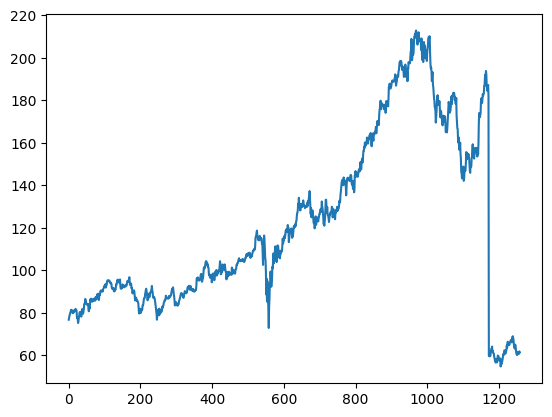

In [8]:
plt.plot(df1)

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(881, 378)

In [12]:
def create_dataset(dataset, time_step=1):
	X, Y = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		X.append(a)
		Y.append(dataset[i + time_step, 0])
	return np.array(X), np.array(Y)

In [13]:
# reshaping
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(780, 100)
(780,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [16]:
# reshape from 2D to 3D
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# Create LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(60,return_sequences=True))
model.add(LSTM(60))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 60)           14880     
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           29040     
                                                                 
 lstm_2 (LSTM)               (None, 60)                29040     
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=70,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 378ms/step - loss: 0.0364 - accuracy: 0.0000e+00 - val_loss: 0.0593 - val_accuracy: 0.0036
Epoch 2/100
12/12 [==============================] - 3s 236ms/step - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 0.0249 - val_accuracy: 0.0036
Epoch 3/100
12/12 [==============================] - 3s 243ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0232 - val_accuracy: 0.0036
Epoch 4/100
12/12 [==============================] - 3s 242ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0217 - val_accuracy: 0.0036
Epoch 5/100
12/12 [==============================] - 3s 249ms/step - loss: 9.2042e-04 - accuracy: 0.0000e+00 - val_loss: 0.0238 - val_accuracy: 0.0036
Epoch 6/100
12/12 [==============================] - 3s 248ms/step - loss: 9.0344e-04 - accuracy: 0.0000e+00 - val_loss: 0.0254 - val_accuracy: 0.0036
Epoch 7/100
12/12 [==============================] - 3s 243ms/step - loss: 8.6522e-04 - accuracy: 0.0000e+00 

In [ ]:
# prediction on X_train and X_test
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 43ms/step


In [ ]:
# Transforming back to original values
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# RMSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict))

112.808453814463

In [ ]:
# Test RMSE on data
math.sqrt(mean_squared_error(ytest,test_predict))

154.38313330901224

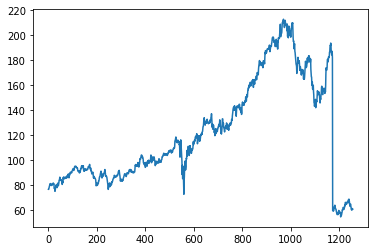

In [ ]:
plt.plot(scaler.inverse_transform(df1))


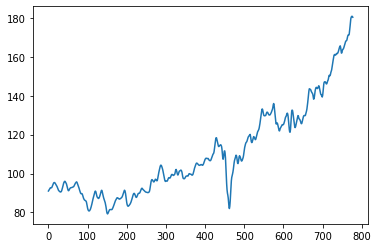

In [ ]:
plt.plot(train_predict)


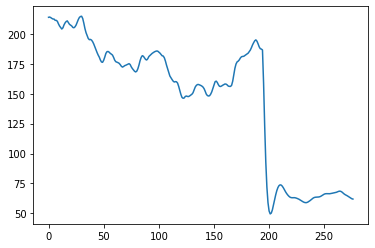

In [ ]:
plt.plot(test_predict)


In [ ]:
x_input=test_data[279:].reshape(1,-1)
x_input.shape

(1, 99)

In [ ]:
new_input=list(x_input)
new_input=new_input[0].tolist()
new_input

[0.8103491902834008,
 0.8123734817813764,
 0.8340713562753035,
 0.8338815789473684,
 0.8582363360323886,
 0.8679149797570849,
 0.8656376518218623,
 0.8794913967611335,
 0.8689903846153846,
 0.8372975708502024,
 0.8292004048582997,
 0.8196482793522266,
 0.8316675101214575,
 0.8378036437246963,
 0.8054149797570849,
 0.031313259109311764,
 0.030680668016194346,
 0.030237854251012164,
 0.0331477732793522,
 0.031186740890688236,
 0.03713309716599189,
 0.048519736842105254,
 0.05275809716599189,
 0.05383350202429149,
 0.059210526315789436,
 0.044913967611336036,
 0.046052631578947345,
 0.04023279352226716,
 0.039600202429149745,
 0.03782894736842102,
 0.028150303643724672,
 0.02416497975708498,
 0.01676366396761131,
 0.013790485829959509,
 0.011513157894736836,
 0.013980263157894746,
 0.02258350202429149,
 0.014929149797570818,
 0.012209008097165963,
 0.0226467611336032,
 0.032578441295546545,
 0.03143977732793518,
 0.030111336032388636,
 0.018408400809716563,
 0.018661437246963564,
 0.02119

In [ ]:
# prediction for next 60 days
list_out=[]
n_steps=99
i=0
while(i<60):
    if(len(temp_input)>99):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        list_out.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        list_out.extend(yhat.tolist())
        i=i+1

In [ ]:
list_out

[[0.1829846352338791],
 [0.1833968460559845],
 [0.18380700051784515],
 [0.18421509861946106],
 [0.184621199965477],
 [0.1850253939628601],
 [0.1854274719953537],
 [0.1858276128768921],
 [0.18622589111328125],
 [0.18662218749523163],
 [0.1870165765285492],
 [0.18740910291671753],
 [0.18779973685741425],
 [0.18818852305412292],
 [0.18857546150684357],
 [0.18896062672138214],
 [0.1893438845872879],
 [0.18972544372081757],
 [0.19010519981384277],
 [0.1904831975698471],
 [0.19085946679115295],
 [0.19123400747776031],
 [0.19160683453083038],
 [0.19197796285152435],
 [0.19234740734100342],
 [0.19271519780158997],
 [0.193081334233284],
 [0.1934458315372467],
 [0.19380870461463928],
 [0.19416990876197815],
 [0.19452963769435883],
 [0.1948876827955246],
 [0.1952442079782486],
 [0.19559916853904724],
 [0.19595256447792053],
 [0.19630444049835205],
 [0.19665485620498657],
 [0.19700366258621216],
 [0.19735106825828552],
 [0.1976969838142395],
 [0.1980413943529129],
 [0.19838440418243408],
 [0.19872

In [ ]:
new=np.arange(1,101)
predct=np.arange(101,161)

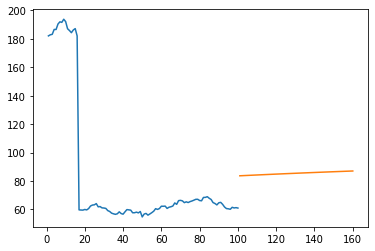

In [ ]:
plt.plot(new,scaler.inverse_transform(df1[1157:]))
plt.plot(predct,scaler.inverse_transform(list_out))